In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

dataset https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [22]:
df = pd.read_csv('data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
df.isnull().sum() # print the sum of null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Since there is no ‘Null’ value, therefore we need not to drop anything.

Next, our aim is to find the buying-patterns of the customers, therefore we do not need the columns ‘Channel’ and ‘Region’ for this analysis. Hence we will drop these two columns

In [24]:
df = df.drop(labels=['Channel', 'Region'], axis=1)

In [25]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Clustering using KMean

In [26]:
#preprocessing
T = preprocessing.Normalizer().fit_transform(df)

In [41]:
#number of clusters
kmean_model = KMeans(n_clusters=6)
kmean_model.fit_predict(T)
kmean_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
centroids, labels

(array([[-0.0854198 , -0.14491678],
        [-0.4762637 , -0.10917702],
        [ 0.33571497,  0.02137537],
        [ 0.00084389,  0.57141567],
        [ 0.64347776, -0.06240134],
        [-0.34840866,  0.22633154]]),
 array([0, 2, 2, 5, 1, 0, 0, 2, 0, 4, 4, 1, 0, 0, 0, 1, 4, 0, 0, 0, 1, 5,
        1, 2, 0, 0, 1, 1, 4, 1, 0, 2, 1, 1, 2, 4, 1, 0, 4, 1, 5, 1, 2, 4,
        2, 4, 4, 2, 0, 4, 5, 2, 1, 4, 1, 2, 4, 4, 1, 2, 0, 2, 2, 2, 5, 4,
        4, 0, 3, 1, 5, 0, 3, 5, 2, 1, 3, 4, 1, 2, 1, 4, 2, 1, 0, 4, 2, 1,
        3, 1, 1, 5, 4, 3, 4, 4, 4, 3, 3, 5, 2, 4, 4, 1, 1, 1, 4, 2, 4, 4,
        1, 2, 5, 1, 1, 1, 1, 0, 1, 5, 1, 5, 1, 2, 1, 1, 5, 0, 4, 1, 5, 1,
        1, 1, 1, 1, 2, 4, 0, 0, 0, 1, 1, 5, 1, 2, 1, 1, 5, 1, 1, 2, 1, 2,
        1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 2, 2, 2, 2, 1, 5, 4, 4, 4, 4, 2, 4,
        1, 0, 0, 3, 0, 1, 4, 3, 4, 5, 3, 2, 2, 4, 5, 1, 0, 4, 1, 5, 5, 4,
        0, 1, 4, 4, 0, 4, 2, 4, 1, 2, 4, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 5,
        1, 4, 3, 3, 1, 1, 0, 5, 2, 5, 5, 2

In [33]:
# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)

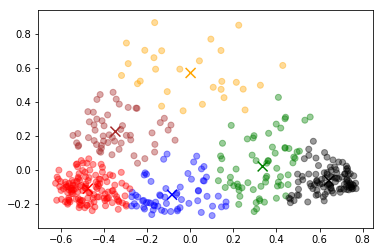

In [35]:
# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[labels[i]] for i in range(len(T)) ]

# plot the PCA components
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = df.columns

# plot the 'name of individual features' along with vector length
# for i in range(len(columns)):
#     # plot arrows
#     plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75
#             )
#     # plot name of features
#     plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.show()

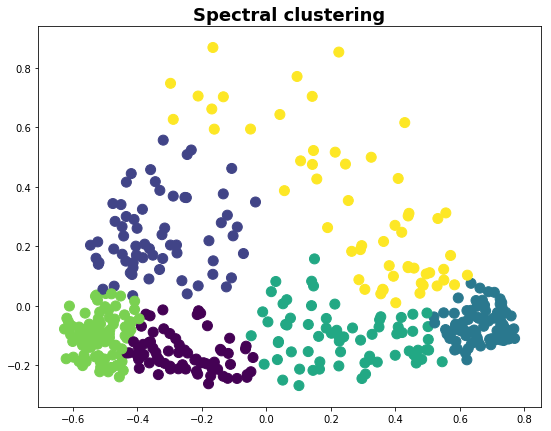

In [46]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors')

labelsS = model.fit_predict(T)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(T[:, 0], T[:, 1], c=labelsS, s=100)


In [47]:
affinity_matrix, labels = model.affinity_matrix_, kmean_model.labels_
centroids, labels

(array([[-0.0854198 , -0.14491678],
        [-0.4762637 , -0.10917702],
        [ 0.33571497,  0.02137537],
        [ 0.00084389,  0.57141567],
        [ 0.64347776, -0.06240134],
        [-0.34840866,  0.22633154]]),
 array([4, 0, 0, 5, 1, 4, 4, 0, 4, 3, 3, 1, 4, 4, 4, 1, 3, 4, 4, 4, 1, 5,
        1, 0, 4, 4, 1, 1, 3, 1, 4, 0, 1, 1, 0, 3, 1, 4, 3, 1, 5, 1, 0, 3,
        0, 3, 3, 0, 4, 3, 5, 0, 1, 3, 1, 0, 3, 3, 1, 0, 4, 0, 0, 0, 5, 3,
        3, 4, 2, 1, 5, 4, 2, 5, 0, 1, 2, 3, 1, 0, 1, 3, 0, 1, 4, 3, 0, 1,
        2, 1, 1, 5, 3, 2, 3, 3, 3, 2, 2, 5, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3,
        1, 0, 5, 1, 1, 1, 1, 4, 1, 5, 1, 5, 1, 0, 1, 1, 5, 4, 3, 1, 5, 1,
        1, 1, 1, 1, 0, 3, 4, 4, 4, 1, 1, 5, 1, 0, 1, 1, 5, 1, 1, 0, 1, 0,
        1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 0, 0, 0, 0, 1, 5, 3, 3, 3, 3, 0, 3,
        1, 4, 4, 2, 4, 1, 3, 2, 3, 5, 2, 0, 0, 3, 5, 1, 4, 3, 1, 5, 5, 3,
        4, 1, 3, 3, 4, 3, 0, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 5,
        1, 3, 2, 2, 1, 1, 4, 5, 0, 5, 5, 0